In [23]:
import numpy as np
import matplotlib.pyplot as plt

def onsager(z, r, tau, n):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [77]:
n = 270
N = 1024
k = 40
num_iterations = 5
s = 0.2
lambda_ = 0.1

# creating fading coefficients
h = random.normalvariate(0, sqrt(.5)) + 1j*random.normalvariate(0, sqrt(.5))
mag_h = abs(h)  # for now we only care about real part

# create sensing matrix A
A = np.sqrt(1/n)*np.random.randn(n, N)
fade_A = A @ abs(h)

# corresponds to SNRs of 1, 5, 10, 20, 30
sigma = [0.8912509381337455, 0.5623413251903491, 0.31622776601683794, 0.1, 0.03162277660168379]

w = sigma[4]*np.random.randn(n).reshape(-1,1)

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

y = fade_A @ x + w

mse_vs_iterations = np.zeros(num_iterations)

In [78]:
# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0


for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau, n) #calulate next onsager
    z = y - A @ xHt + ons
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)

    # find the current error
    mse_vs_iterations[idx_iter] = (1/N) * np.sum((x - xHt)**2)

In [79]:
mse_vs_iter = np.zeros(num_iterations)
xHt = np.zeros(x.shape)
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
    # find the current error
    mse_vs_iter[idx_iter] = (1/N) * np.sum((x - xHt)**2)

In [80]:
lista10 = [0.02735818363726139, 0.028723379597067833, 0.030329732224345207, 0.030796675011515617, 0.03051833063364029]
lista20 = [0.017235206440091133, 0.012382063083350658, 0.010942485183477402, 0.010209700092673302, 0.009579195640981197]
lista30 = [0.0155345369130373, 0.009263429790735245, 0.0066907210275530815, 0.005058402195572853, 0.00397052988409996]
noiseless_lista = [.0288, .0257, .023, .0212, .019]

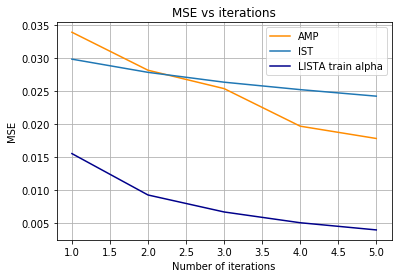

n = 270 | N = 1024 | k = 40
SNR = 30dB


In [81]:
# comparing all three algorithms

plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
#plt.plot(range(1, num_iterations+1), lista30, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 30dB')

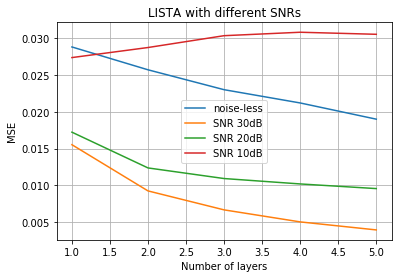

In [82]:
# comparing lista at different noises
plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

# Below values are for when only alpha was trained

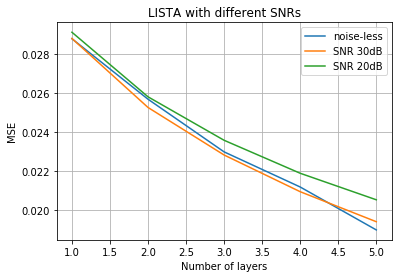

In [64]:
noiseless_lista = [.0288, .0257, .023, .0212, .019]

plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
#plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

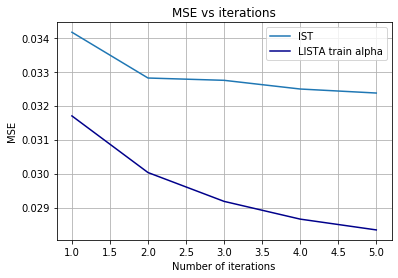

n = 270 | N = 1024 | k = 40
SNR = 10dB


In [60]:
# 30dB
lista30 = [0.028813188895583153, 0.02527638152241707, 0.022840021178126335, 0.020958876237273216, 0.019420886412262917]

#20dB
lista20 = [0.02913258969783783, 0.025823263451457024, 0.023594414815306664, 0.021904321387410164, 0.02054455131292343]

#10db
lista10 = [0.03169730305671692, 0.03002990037202835, 0.029181115329265594, 0.028658872470259666, 0.028340915217995644]

plt.figure()
#plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
plt.plot(range(1, num_iterations+1), lista10, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 10dB')